
# 2 Explanation of different measures

[Picture would be nice]

**Example 2.1.** Consider three countries, each with 100,000 people and an area of $100km^2$, and think about the population of each square kilometre grid square.

1.  *Averagia*  has  a  uniform  spread  of  population,  with  1,000  people  living  in  each  gridsquare.
2.  *Builtupia*  has  ten  towns,  each  of  10,000  people  living  in  a  single  square  kilometre, and the remaining land is uninhabited.
3.  *Citia* has one city, where 100,000 people live in a single square kilometre, and where the remaining land is uninhabited.


Heatmap on a 10x10 grid?


Perfect situation to use a dot density map
Dot distribution map
A dot distribution map, or dot density map, is a map type that uses a dot symbol to show the presence of a feature or a phenomenon. Dot maps rely on a visual scatter to show spatial pattern.


Yes, and randomize+jitter dot placement within the defined cells of the grid.


Not sure the name of it, I see it specific to world maps, population numbers, the idea is a 3D column off of the map area, get an idea of population per x, compared to the surrounding x’s.


Same thing here, map out your distro’s, place a column going up based on pop numbers vs surrounding green space.


Choropleth map with a color scale mapped linearly to population.


Would be all the same light color cells in the grid
Would have 10 moderate color cells and very light remaining cells
would have 1 very dark cell and very light remaining cells
You could imagine hovering over each part of the map and seeing the population estimate for that subset of the countries


# Perfect situation to use a dot density map

In [1]:

import numpy as np

total_pop = 100_000

# Averagia has a uniform spread of population, with 1,000 people living in each gridsquare.
averagia_people_count = 1_000
averagia_town_count = total_pop / averagia_people_count

# Builtupia has ten towns, each of 10,000 people living in a single square kilometre, and the remaining land is uninhabited.
builtupia_people_count = 10_000
builtupia_town_count = total_pop / builtupia_people_count

# Citia has one city, where 100,000 people live in a single square kilometre, and where the remaining land is uninhabited.
citia_people_count = 100_000
citia_town_count = total_pop / citia_people_count

gridsquare_count = total_pop / averagia_people_count
side_length = int(np.sqrt(gridsquare_count))

In [2]:

%run ../../load_magic/storage.py
s = Storage()
averagia_data = s.load_object('averagia_data')
builtupia_data = s.load_object('builtupia_data')
citia_data = s.load_object('citia_data')

In [3]:

def save_fig_as_various(fig, chart_name):
    for dir_name in ['pgf', 'png', 'svg']:
        dir_path = os.path.join(s.saves_folder, dir_name)
        os.makedirs(name=dir_path, exist_ok=True)
        file_path = os.path.join(dir_path, '{}.{}'.format(chart_name, dir_name))
        fig.savefig(file_path)

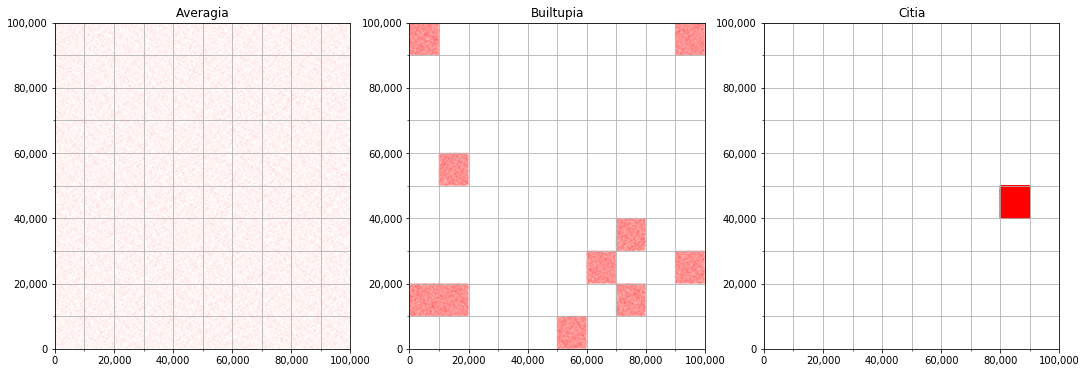

In [4]:

from matplotlib.text import Text
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

minor_multiple = 10_000
lim_tuple = (0, total_pop)
tuple_list = [(averagia_data, 'Averagia'),
              (builtupia_data, 'Builtupia'),
              (citia_data, 'Citia')]
scatter_kws = dict(c='r', alpha=0.01, marker='s', s=5, linewidths=0)
ticklabels_list = [Text(n, 0, '{:,}'.format(int(n))) for n in np.linspace(0, total_pop, 6)]

fig = plt.figure(figsize=(18, 18/3))
for i, data_tuple in enumerate(tuple_list):
    data = data_tuple[0]
    title = data_tuple[1]
    ax = fig.add_subplot(1, 3, i+1)
    ax.set_xlim(lim_tuple)
    ax.set_ylim(lim_tuple)
    for i in range(10):
        for j in range(10):
            local_pop = data[i][j]
            if local_pop > 0:
                x_min = i * minor_multiple
                x_max = x_min + minor_multiple - 1
                x = np.linspace(x_min, x_max, num=local_pop)
                y_min = j * minor_multiple
                y_max = y_min + minor_multiple - 1
                y = np.linspace(y_min, y_max, num=local_pop)
                np.random.shuffle(x)
                np.random.shuffle(y)
                Line2D_list = ax.scatter(x, y, **scatter_kws)
    ax.xaxis.set_minor_locator(MultipleLocator(minor_multiple))
    ax.yaxis.set_minor_locator(MultipleLocator(minor_multiple))
    ax.grid(b=True, which='major', axis='both')
    ax.grid(b=True, which='minor', axis='both')
    Text_tuple = ax.set_title(title)
    tll = ax.xaxis.set_ticklabels(ticklabels_list)
    tll = ax.yaxis.set_ticklabels(ticklabels_list)

save_fig_as_various(fig, 'example_2_1_dot_density_map')